In [ ]:
import os
import numpy as np

np.load(os.path.join("/home/mariopasc/Python/Datasets/Meningiomas/BraTS/SR/SMORE_Results", "metrics_t1c" + ".npz"), allow_pickle=True)

In [1]:
import os

import numpy as np
import nibabel as nib

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

PATH_ROOT = "/home/mariopasc/Python/Datasets/Meningiomas/BraTS/BraTS_Men_Train/"
PATIENT = "BraTS-MEN-00245-000"

MODALITIES = ["t1c", "t1n", "t2w", "t2f", "seg"] # + segmentation

volumes = {}
for mod in MODALITIES:
    path = os.path.join(PATH_ROOT, PATIENT, PATIENT + "-" + mod + ".nii.gz")
    volumes[mod] = nib.load(path).get_fdata().astype(np.float64)

unique = np.unique(volumes.get("seg"))
print(f"Unique segmentation labels: {unique}")

Unique segmentation labels: [0. 1. 2. 3.]


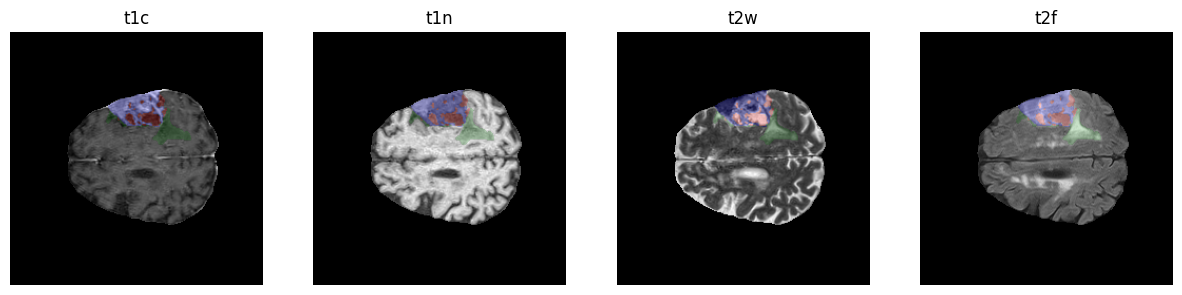

In [6]:
slice_idx = 100
slices = {mod: np.squeeze(np.take(volumes[mod], indices=slice_idx, axis=2)) for mod in volumes.keys()}

# Mask the background (0)
slices["seg"] = np.ma.masked_where(slices["seg"] == 0, slices["seg"])

# Define colors for labels 1, 2, 3 (0 will be transparent)
colors = ["none", "red", "green", "blue"]  # "none" makes 0 transparent
cmap = mcolors.ListedColormap(colors[1:])  # Skip the first color (0)
bounds = [0.5, 1.5, 2.5, 3.5]  # Define boundaries for each class
norm = mcolors.BoundaryNorm(bounds, cmap.N)  # Normalize labels to colormap

_, axes = plt.subplots(1, 4, figsize=(15,5))

for i, (mod, img) in enumerate(slices.items()):

    if mod == "seg": continue

    ax = axes[i]
    ax.imshow(img, cmap="gray")  
    ax.imshow(slices["seg"], cmap=cmap, norm=norm, alpha=0.2)
    ax.set_title(mod)
    ax.axis("off")

plt.show()

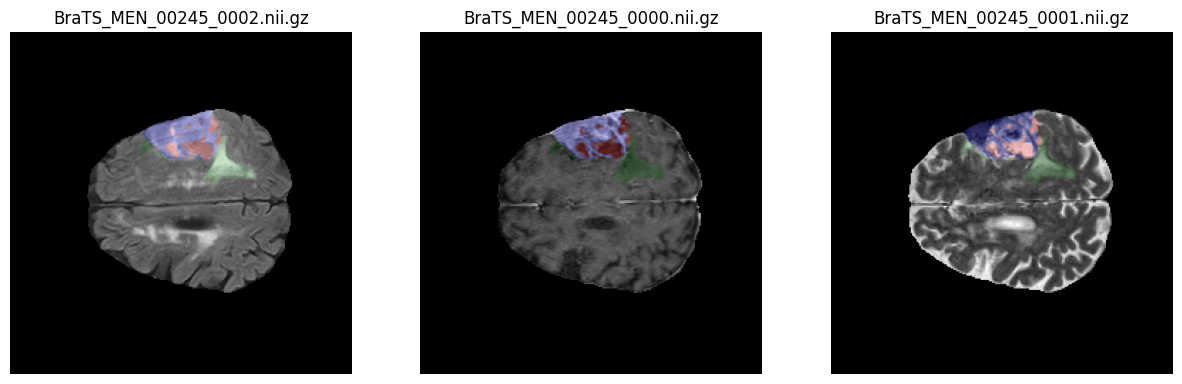

In [41]:
from pathlib import Path
from re import S

PATH_ROOT = "/home/mariopasc/Python/Datasets/Meningiomas/BraTS/"
PATIENT = "BraTS_MEN_00245"

nnUNet_path = os.path.join(PATH_ROOT, "nnUNet/nnUNet_raw/Dataset501_BraTSMen")

images = os.path.join(nnUNet_path, "imagesTr")
labels = os.path.join(nnUNet_path, "labelsTr")

modalities = list(Path(images).glob(f"{PATIENT}*.nii.gz"))
label = list(Path(labels).glob(f"{PATIENT}*.nii.gz"))

modalities.extend(label)

volumes = {}
for path in modalities:
    volumes[path.name] = nib.load(path).get_fdata().astype(np.float64)

seg_label = label[0].name

slice_idx = 100
slices = {mod: np.squeeze(np.take(volumes[mod], indices=slice_idx, axis=2)) for mod in volumes.keys()}

# Mask the background (0)
slices[seg_label] = np.ma.masked_where(slices[seg_label] == 0, slices[seg_label])

# Define colors for labels 1, 2, 3 (0 will be transparent)
colors = ["none", "red", "green", "blue"]  # "none" makes 0 transparent
cmap = mcolors.ListedColormap(colors[1:])  # Skip the first color (0)
bounds = [0.5, 1.5, 2.5, 3.5]  # Define boundaries for each class
norm = mcolors.BoundaryNorm(bounds, cmap.N)  # Normalize labels to colormap

_, axes = plt.subplots(1, 3, figsize=(15,5))

for i, (mod, img) in enumerate(slices.items()):

    if mod == seg_label: continue

    ax = axes[i]
    ax.imshow(img, cmap="gray")  
    ax.imshow(slices[seg_label], cmap=cmap, norm=norm, alpha=0.2)
    ax.set_title(mod)
    ax.axis("off")

plt.show()


In [ ]:
# Define the paths to the modalities
base_path = "/home/mariopasc/Python/Datasets/Meningiomas/Meningioma_Adquisition"
tc_path = os.path.join(base_path, "TC")
rm_paths = [os.path.join(base_path, "RM", folder) for folder in ["SUSC", "T1", "T1SIN", "T2"]]

# Get patient folders in each modality
tc_patients = set(os.listdir(tc_path))
rm_patients = [set(os.listdir(rm_path)) for rm_path in rm_paths]

# Find the intersection of all sets
common_patients = tc_patients.intersection(*rm_patients)

print(f"Number of patients in all modalities: {len(common_patients)}")
print(f"Patients: {sorted(common_patients)}")


Number of patients in all modalities: 24
Patients: ['P1', 'P12', 'P14', 'P15', 'P16', 'P19', 'P21', 'P22', 'P24', 'P26', 'P29', 'P35', 'P36', 'P40', 'P42', 'P45', 'P5', 'P50', 'P52', 'P6', 'P68', 'P7', 'P72', 'P73']
